In this practice, we will perform a simple linear regression with tensorflow. 
First, let's import some python packages: numpy, tensorflow and matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Let us assume that our observation (x,y) has a form \\( y=2x+8+\epsilon \\), where the noise term has a distribution \\( \epsilon \sim N(0,s^2) \\).

Create total 10,000 samples which will be used for training and evaluation.

In [2]:
n_samples = 500
x_data = np.random.randn(n_samples,1).flatten()
eps = np.random.normal(0.0, 1.0, n_samples)
y_data = 2*x_data + 8. + eps

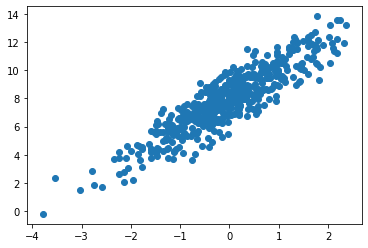

In [3]:
plt.scatter(x_data, y_data)

Then, we should define a computational graph of our hypothesis. 

The first step is to declare placeholders - tensor variables that will take data samples.

In [4]:
x = tf.placeholder(tf.float64, shape=[None,])
y = tf.placeholder(tf.float64, shape=[None,])

We assume that our hypothesis is one-dimensioanl linear model, \\(y = ax+b\\).

In [5]:
x_ = tf.expand_dims(x, axis=-1)
print (x_)
y_pred = tf.keras.layers.Dense(units=1, use_bias=True, activation=None)(x_)
y_pred = tf.reshape(y_pred, [-1])
print (y_pred)

Tensor("ExpandDims:0", shape=(?, 1), dtype=float64)
Instructions for updating:
Colocations handled automatically by placer.
Tensor("Reshape:0", shape=(?,), dtype=float64)


The operation 'tf.keras.layers.dense' performs a matrix multiplication \\( Y = X*weight + bias \\).
See examples and arguments for this operation at https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense. 

We should minimize the risk of our hypothesis represented by L2-norm, \\( \frac{1}{n} \sum_{i=1}^{n}|y_i-y_{pred,i} |^2\\), where $i$ is the index of training examples.

In [6]:
loss = tf.reduce_mean((y-y_pred)**2)
print (loss)

Tensor("Mean:0", shape=(), dtype=float64)


Declare a new session and an optimer to be used for a gradient descent minimization. 

In [7]:
sess = tf.Session()
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

OK, we ready to train our hypothesis. 

In the training and validation phases, we can train our model by feeding examples to the computational graph. 

[34.18902799659905, 7.43669992227283, 2.185174712554022, 1.1596562087534337, 0.9619471371804684, 0.9250072404117397, 0.9186458018483732, 0.9178049216320296, 0.9178236536657609, 0.9179094999779135]
[11.688806570029767, 2.761284879201656, 1.2237809355436655, 1.022937429556944, 1.029545201429165, 1.051556083917972, 1.0651425117496047, 1.0719432575807413, 1.0751202921027276, 1.0765643971496548]


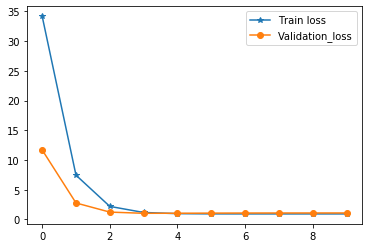

In [8]:
batch_size = 10
num_epoches = 10
num_train = 400
x_train = x_data[:num_train]
x_validation = x_data[num_train:]
y_train = y_data[:num_train]
y_validation = y_data[num_train:]
num_train_batches = x_train.shape[0] // batch_size
num_validation_batches = x_validation.shape[0] // batch_size

train_loss_list = []
validation_loss_list = []
for epoch in range(num_epoches):
    # Train
    train_loss = 0.0
    for i in range(num_train_batches):
        x_batch = x_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]
        _, train_loss_batch = sess.run([opt, loss], feed_dict={x:x_batch, y:y_batch})
        train_loss += train_loss_batch
    train_loss /= num_train_batches
    train_loss_list.append(train_loss)
    
    # Validation
    validation_loss = 0.0
    for i in range(num_validation_batches):
        x_batch = x_validation[i*batch_size:(i+1)*batch_size]
        y_batch = y_validation[i*batch_size:(i+1)*batch_size]
        validation_loss_batch = sess.run(loss, feed_dict={x:x_batch, y:y_batch})
        validation_loss += validation_loss_batch
    validation_loss /= num_validation_batches
    validation_loss_list.append(validation_loss)

print (train_loss_list)
print (validation_loss_list)
# Plot train and validation losses w.r.t training epoches
x__ = np.arange(0,num_epoches)
plt.plot(x__, train_loss_list, '*-', label='Train loss')
plt.plot(x__, validation_loss_list, 'o-', label='Validation_loss')
plt.legend()

Let's check predictions made by our hypothesis. 

The command 'tf.trainable_variables' show the weight and bias variables of our hypothesis

In [9]:
tf.trainable_variables()

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float64>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float64>]

We can check their values by executing the 'sess.run' command.

In [10]:
sess.run(tf.trainable_variables())

[array([[2.0355584]]), array([8.0527493])]

We got our hypothesis having a form \\( y=2.0355584*x + 8,0527493 \\).

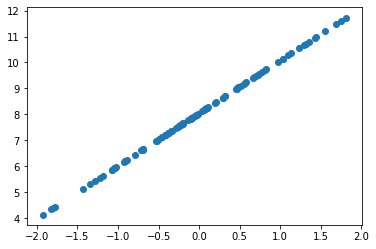

In [12]:
x_test = np.random.randn(100, 1).flatten()
num_test_batches = x_test.shape[0] // batch_size
y_test = []
for i in range(num_test_batches):
    x_batch = x_test[i*batch_size:(i+1)*batch_size]   
    y_test_batch = sess.run(y_pred, feed_dict={x:x_batch})
    y_test.append(y_test_batch)
y_test = np.asarray(y_test).flatten()
# Plot
plt.figure()
plt.scatter(x_test, y_test)